<a href="https://colab.research.google.com/github/Luisadle/Business-Intelligence/blob/main/Reto_4_Parcial_1_Luisa_De_La_Espriella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parcial 1 - Luisa Alejandra De La Espriella Palmett**

---
***Descripción de datos:*** La base de datos proporcionada, que contiene 455 registros, revela una distribución de partidos en relación con el promedio de la variable (369.56629): 255 partidos se sitúan por debajo de este promedio, mientras que 190 se encuentran por encima.
Para la implementación del los diferentes modelos (Naives Bayes, Árbol de Decisión y KMeans) se utilizaron las siguientes variables:

*   Salary: Es el salio anual del jugador en 2015-2016.
*   Age: Hace referencia a la edad del jugador en 2015-2016.
*   Height: Se refiere a la altura del jugador en pulgadas en 2015- 2016.
*   Weight:Es el peso del jugador en libras en 2015-2016.
*   Games Played: Número total de partidos jugados.
*   Games Started: Número de partidos jugados como titular.
*   Minutes per Game: Minutos promedio por cada partido
*   Assists: Esta variable hace referenciz al número total de veces que el jugador hizó un paso a otro jugador para que anotara una canasta.
*   Blocks: Es el número total de veces que jugador impidió que el oponente hiciera un tiro (como condición el balón debe "ir hacia arriba" para contar)
*   Steals: Número total de veces que el jugador obtuvo el control legal del balón del oponente.











0. Se cargan las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargan las bases de datos

In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['salary','age','height','weight','games_played','games_started','minutes_per_game','assists','blocks','steals']]
XDB=XDB.dropna()

XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]
yd=XDB['games_played']



2. Implementación del modelo Naives Bayes




In [ ]:
from sklearn.naive_bayes import GaussianNB #Prestamo interbibliotecario

mnb=GaussianNB()
mnb.fit(XD,yd)

#Obtenemos la información del modelo
media=mnb.theta_
print("La media de las variables es:\n", media)

var=mnb.var_
print("La varianza de las variables es:\n", var)

sigma=np.sqrt(var)
print("La desviación estándar de las variables es:\n", sigma)

#Se determinan los limites superiores e inferiores de las variables
LS=media+sigma
LI=media-sigma
print("El límite superior de las variables es:\n", LS)
print("El límite inferior de las variables es:\n", LI)


La media de las variables es:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de las variables es:
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de las variables es:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El límite superior de las variables

2.1. Se procede a evaluar al solicitante con el modelo Naive Baiyes


In [ ]:
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]
ydp=mnb.predict(XDS)
print("La predicción del solicitante es:\n", ydp)

if ydp==1:
  print("El candidato se encuentra por encima del promedio")
else:
  print("El canditato se encuentra por debajo del promedio")


La predicción del solicitante es:
 [0]
El canditato se encuentra por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


2.2. Se realiza el desempeño del modelo Naives Bayes

In [ ]:
ydp2=mnb.predict(XD)
cm=confusion_matrix(yd,ydp2)
print("La matriz de confusión es:\n", cm)
VN=cm[0,0] #Verdadero Negativo
FP=cm[0,1] #Falso Positivo
FN=cm[1,0] #Falso Negativo
VP=cm[1,1] #Verdadero Positivo

#Metricas de Desempeño
Exactitud=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es:\n", Exactitud)

TE= (FN+FP)/(VP+VN+FP+FN)
print("La tasa de error  es:\n", TE)

Sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es:\n", Sensibilidad)

Especificidad=VN/(VN+FP)
print("La especificidad del modelo es:\n", Especificidad)

Precision=VP/(VP+FP)
print("La precisión del modelo es:\n", Precision)

PrNeg=VN/(VN+FN)
print("La probabilidad de Negación del modelo es:\n", PrNeg)

La matriz de confusión es:
 [[236  19]
 [ 76 114]]
La exactitud del modelo es:
 0.7865168539325843
La tasa de error  es:
 0.21348314606741572
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La probabilidad de Negación del modelo es:
 0.7564102564102564


3. Implementación del modelo Árbol de Decisión

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

ve=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']
dot_data=export_graphviz(mar,feature_names=ve)
graph=graph_from_dot_data(dot_data)
graph.write_png('ÁrbolDecisión-Parcial 1.png')



True

3.1.  Se procede a evaluar al solicitante con el modelo Árbol de Decisión

In [ ]:
XDS1=[5000000,37,82,245,45,17.8,0.5,1.4,0.4]
print("Los datos del cantidato son:", XDS1)
ydp3=mar.predict([XDS1])
print("La predicción del solicitante es:\n", ydp3)

Los datos del cantidato son: [5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]
La predicción del solicitante es:
 [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


3.2. Evaluamos el modelo Árbol de Decisión

In [ ]:
ydp=mar.predict(XD) #Pronóstico sobre la base de datos original
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es: ",cm)

VN=cm[0,0] #Verdadero Negativo
FP=cm[0,1] #Falso Positivo
FN=cm[1,0] #Falso Negativo
VP=cm[1,1] #Verdadero Positivo

#Metricas de Desempeño
Exactitud=(VP+VN)/(VP+VN+FP+FN)
print("La Exactitud  es:\n", Exactitud)

TE= (FN+FP)/(VP+VN+FP+FN)
print("La tasa de error  es:\n", TE)

Sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es:\n", Sensibilidad)

Especificidad=VN/(VN+FP)
print("La especificidad del modelo es:\n", Especificidad)

Precision=VP/(VP+FP)
print("La precisión del modelo es:\n", Precision)

PrNeg=VN/(VN+FP)
print("La probabilidad de Negación del modelo es:\n", PrNeg)

La matriz de confusión es:  [[247   8]
 [ 12 178]]
La Exactitud  es:
 0.9550561797752809
La tasa de error  es:
 0.0449438202247191
La sensibilidad del modelo es:
 0.9368421052631579
La especificidad del modelo es:
 0.9686274509803922
La precisión del modelo es:
 0.956989247311828
La probabilidad de Negación del modelo es:
 0.9686274509803922


4. Modelo KMeans - Clusterización

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

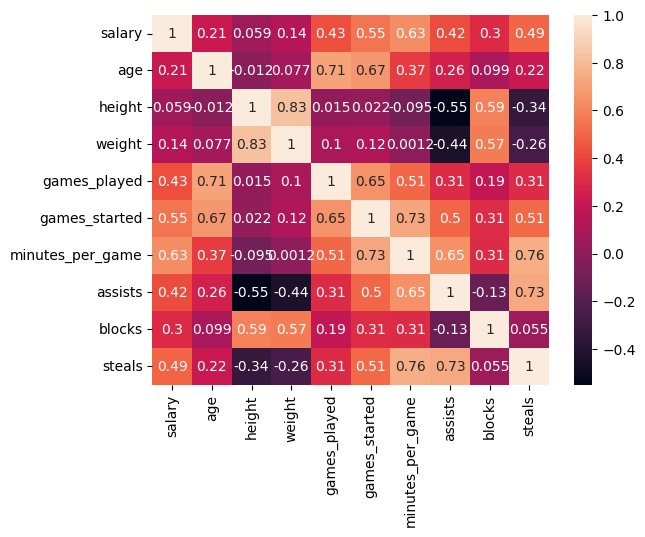

In [ ]:
#Para mirar correlaciones y variables importantes
plt.figure ()
sns.pairplot(XDB,hue='games_played',size=9,vars=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals'])
plt.show()

#Cuales son las correlaciones
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

4.1. Se procede con la implementación del modelo de clusterización


In [ ]:
#Se van a crear 5 montoncitos de datos
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,init='random',random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:", centroids)

#como quedaron clasificados las personas
labels=mkm.labels_
XDB['labels']=labels #Adiciona a la tabla el cluster al que pertenece un solicitante
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters son:", ND)

EPos=XDB.groupby('labels').agg({"games_played":lambda x:(x==1).sum()})
ENeg=XDB.groupby('labels').agg({"games_played":lambda x:(x==0).sum()})
print("El número de personas que han jugado más partidos que el promedio:",EPos)
print("El número de personas que han jugado por debajo del promedio :",ENeg)

#Se procede con la estimación de los porcentajes de PreApr
EPos['games_played']=EPos['games_played']/ND
ENeg['games_played']=ENeg['games_played']/ND
print("El porcentaje de personas que han participado en partido por encima del promedio:",EPos)
print("El porcentaje de personas que han participado en partidos por debajo del promedio:",ENeg)

Los centroides son: [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01]]


salary  age  height  weight  games_played  games_started  \
0      947276   36      79     260             1            838   
1    25000000   37      78     212             1           1198   
2     4088019   39      78     220             1            954   
3     5675000   36      77     195             1            432   
4     5250000   40      83     250             1           1389   
..        ...  ...     ...     ...           ...            ...   
440   1733040   19      78     202             0              6   
441   1140240   21      83     200             0              4   
442   1131960   20      81     220             0              0   
443   3102240   20      77     200             0             66   
444    525093   23      79     185             0              0   

     minutes_per_game  assists  blocks  steals  labels  
0                32.4      2.7     0.5     1.8       4  
1                36.1      4.7     0.5     1.4       2  
2                32.4      3.4     0.6     1.1       1  
3                30.9      3.6     0.2     1.0       1  
4                34.0      3.0     2.2     0.7       1  
..                ...      ...     ...     ...     ...  
440              14.3      0.6     0.2     0.4       4  
441              15.1      0.4     0.5     1.2       4  
442               4.2      0.0     0.0     0.0       4  
443              30.4      5.5     0.5     1.0       1  
444               3.5      0.1     0.0     0.0       4  

[445 rows x 11 columns]

El tamaño de los clusters son: [ 49 111  16  55 214]
El número de personas que han jugado más partidos que el promedio:         games_played
labels              
0                 33
1                 52
2                 16
3                 43
4                 46
El número de personas que han jugado por debajo del promedio :         games_played
labels              
0                 16
1                 59
2                  0
3                 12
4                168
El porcentaje de personas que han participado en partido por encima del promedio:         games_played
labels              
0           0.673469
1           0.468468
2           1.000000
3           0.781818
4           0.214953
El porcentaje de personas que han participado en partidos por debajo del promedio:         games_played
labels              
0           0.326531
1           0.531532
2           0.000000
3           0.218182
4           0.785047


4.2. Se procede a evaluar el modelo de KMeans

In [ ]:
ydp=np.zeros((len(XD),1))
VPos=np.array(EPos);VNeg=np.array(ENeg)

for k in range (len(XD)):
  np=labels[k]
  print("La persona tal: ",k)
  print("El cluster al que pertenece es:", np)
  print("El procentaje de que la personas que jugar más cantidad de partidos a comparación con el promedio: ", VPos[np])
  print("El procentaje de que la persona que jugar menos cantidad de partidos a comparación del promedio: ",VNeg[np])

#Consolidamos la información de los aprobados y negados
  if VPos[np]>VNeg[np]:
    ydp[k]=1
  else:
    ydp[k]=0


#Se Evalua el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:", cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

exactitud=(VP+VN)/(VP+VN+FP+FN)
sensibilidad=VP/(VP+FN)
especificidad=VN/(VN+FP)
precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
PredNeg=VN/(VN+FP)

print("La exactitud es:",exactitud)
print("La sensibilidad es:",sensibilidad)
print("La especificidad es:",especificidad)
print("La precisión es:",precision)
print("La tasa de error es:",TasaError)
print("La tasa de predicción negativa es:",PredNeg)

La persona tal:  0
El cluster al que pertenece es: 4
El procentaje de que la personas que jugar más cantidad de partidos a comparación con el promedio:  [0.21495327]
El procentaje de que la persona que jugar menos cantidad de partidos a comparación del promedio:  [0.78504673]
La persona tal:  1
El cluster al que pertenece es: 2
El procentaje de que la personas que jugar más cantidad de partidos a comparación con el promedio:  [1.]
El procentaje de que la persona que jugar menos cantidad de partidos a comparación del promedio:  [0.]
La persona tal:  2
El cluster al que pertenece es: 1
El procentaje de que la personas que jugar más cantidad de partidos a comparación con el promedio:  [0.46846847]
El procentaje de que la persona que jugar menos cantidad de partidos a comparación del promedio:  [0.53153153]
La persona tal:  3
El cluster al que pertenece es: 1
El procentaje de que la personas que jugar más cantidad de partidos a comparación con el promedio:  [0.46846847]
El procentaje de qu

4.3. Se evalua a la persona de interés bajo el modelo de KMeans

La persona pertenece al cluster: [1]
El porcentaje de jugar más partidos que el promedio es: [[0.46846847]]
El porcentaje de jugar menos partidos que el promedio es: [[0.53153153]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


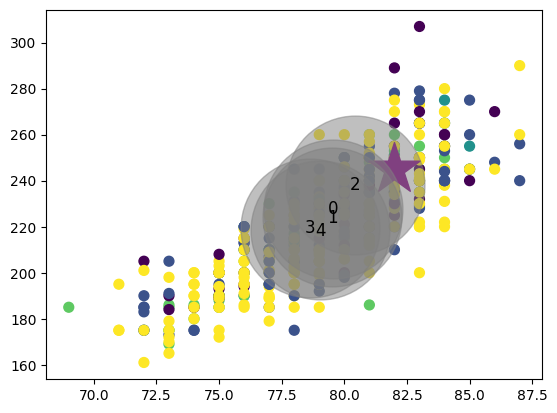

In [ ]:
XDn=([(5000000,37,82,245,45,17.8,0.5,1.4,0.4)])
ydn=mkm.predict(XDn)
print("La persona pertenece al cluster:",mkm.predict(XDn))
print("El porcentaje de jugar más partidos que el promedio es:",VPos[ydn])
print("El porcentaje de jugar menos partidos que el promedio es:",VNeg[ydn])

plt.scatter(XD.iloc[:,2],XD.iloc[:,3],c=labels,s=50,cmap='viridis')
plt.scatter(XDn[0][2],XDn[0][3],marker='*',s=1500,facecolors='purple')
plt.scatter(centroids[:,2],centroids[:,3],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i,c in enumerate(centroids):
 plt.text(c[2],c[3],str(i),fontsize=12,color='black',ha='center',va='center')
plt.show()

**Analisis de Resultados:** Al implementar estos 3 modelos, logramos concluir lo siguinte:

---
***Naive Bayes***: Este modelo presentó una Exactitud por encima del 75%(78.65%), presentando un excelente comportamiento frente a la predicción, por lo tanto, evidenciamos que la tasa de error del modelo es bastante baja, llegando apenas a un 21.3%. Adicionalmente, es importante resaltar que le modelo presento una especificidad por encima del 90% (92.54%), además presento una precisión del 85%.

Por otro lado, para la predicción del jugador el modelo predijo que este se encuentra por debajo del promedio, sin embargo de acuerdo al excel este se encuentra por encima del promedio.

***Árbol de Decisión:*** Este modelo presento un comportamiento detacable, asimismo viendo los resultados de todos lo modelos inmplementados, este modelo presenta el mejor comportamiento ya que presenta todas las métricas de desempeño por encima del 95%, especificamente una exactitud de 95.50%, una sensibilidad de 93.68%, una especificidad de 96.86% y una precisión de 95.69%.

Por otro lado, este modelo presento 6 nodos puros.

***KMeans:*** Para la realización de este modelo, primeramente establecimos 5 clusters (0,1,2,3,4), las cuales estaban compuestas por 49,111,16,55,214 datos respectivamente. Adicionalmente, el cluster 2 se caracterizo por unicamente tener personas que han jugado partidos por encima del promedio (100%). Además, los cluster 1 y 4 se caracterizaron por tener menor cantidad de jugadores que participaban en partidos por encima del promedio (46% y 21% respectivamente), mientras que el cluster 0 se presento que las personas que han participados en partidos por encima del promedio de 67% y el cluster 3, bajo la mismas caracteristicas, tuvo un porcentaje del 78%.

Por otro lado, las variables con más correlación fueron "Weight" y "height". Este modelo presento una exctitud por encima del por debajo del 75%(71%), sin embargo lo mantuvo alto, presentando un comportamiento aceptable del modelo. Adicionalmente presnto una especificidad de 89% y sensibilidad de 48%.

Respecto al jugador dado, de acuerdo a este modelo podemos conluir que este hace parte del cluster 1, su probabilidad de 46% de haber jugado más partido sobre el promedio y una probabilidad de estar por debajo de 53%.


